<a href="https://colab.research.google.com/github/skylarsepanek/Stats_Sepanek/blob/main/Sepanek_Lab_6_Linear_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://setosa.io/ev/ordinary-least-squares-regression/


In [120]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import urllib.request

In [121]:
url = "https://raw.githubusercontent.com/skylarsepanek/Stats_Sepanek/main/cereal_data.csv"

In [122]:
urllib.request.urlretrieve(url, 'cereal_data.csv')  

('cereal_data.csv', <http.client.HTTPMessage at 0x7f85b8c11090>)

In [123]:
cereal_data = pd.read_csv('cereal_data.csv')  

In [124]:
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [125]:
cereal_data["sugars"] #amt of sugars in each row

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64

In [126]:
cereal_data[["calories", "sugars"]]

,calories,sugars
0,70,6
1,120,8
2,70,5
3,50,0
4,110,8
...,...,...
72,110,3
73,110,12
74,100,3
75,100,3


In [127]:
cereal_data[ "sugars"].mean() #mean of suagrs

6.922077922077922

In [128]:
cereal_data[["calories", "sugars"]].mean() #mean of cals and suagrs

calories    106.883117
sugars        6.922078
dtype: float64

In [129]:
cereal_data.describe() #average data

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


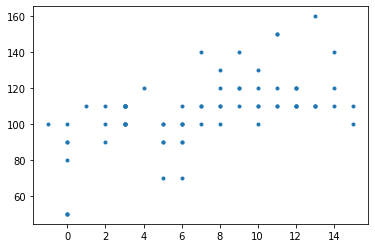

In [130]:
plt.plot(cereal_data[["sugars"]],cereal_data[["calories"]],'.') # plots sugars vs cals

Text(0.5, 1.0, 'Sugars VS Carlories')

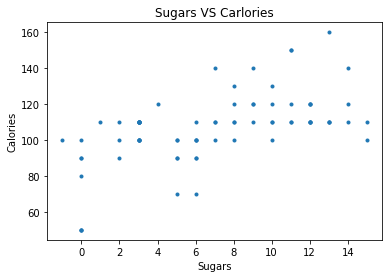

In [131]:
x = cereal_data[["sugars"]]          #same plot as above just broken down
y = cereal_data[["calories"]]

plt.plot(x,y,'.')
plt.xlabel("Sugars")
plt.ylabel("Calories")
plt.title("Sugars VS Carlories")   #added labels to graph

Text(0.5, 1.0, 'Fat VS Carlories')

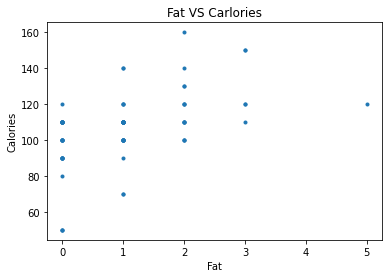

In [132]:
x = cereal_data[["fat"]]          #sub sugar for fat
y = cereal_data[["calories"]]

plt.plot(x,y,'.')
plt.xlabel("Fat")
plt.ylabel("Calories")
plt.title("Fat VS Carlories")

Text(0.5, 1.0, 'Fat VS Protein')

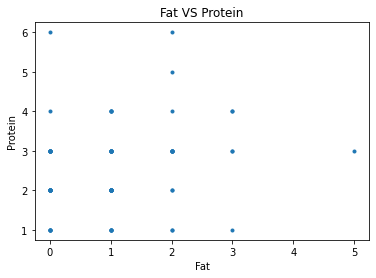

In [133]:
x = cereal_data[["fat"]]          #sub cals for protein
y = cereal_data[["protein"]]

plt.plot(x,y,'.')
plt.xlabel("Fat")
plt.ylabel("Protein")
plt.title("Fat VS Protein")

In [134]:
X = cereal_data[["fat"]]   
Y = cereal_data[["protein"]]

In [135]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression() 

In [136]:
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

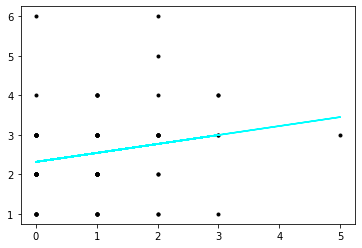

In [137]:
plt.plot(X, Y,'k.')
plt.plot(X, Y_pred, color='cyan')
plt.show()

In [138]:
x = np.linspace(0,10,50) 

In [139]:
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [140]:
m=3   #synthetic data set
b=7
y=m*x+b

In [141]:
noise = 10 * np.random.randn(50,) #noise is random numbers

In [142]:
y=m*x+b+noise 

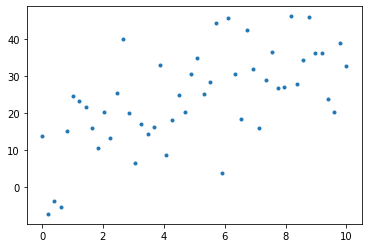

In [143]:
plt.plot(x,y,'.');

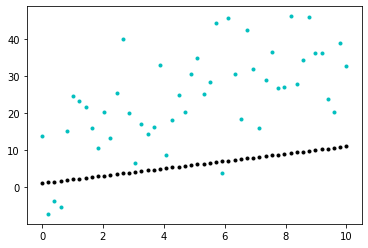

In [144]:
m_guess = 1   #making guess
b_guess = 1

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'k.');  #changed colors of graph
plt.plot(x,y,'c.');


In [145]:
#bad guess

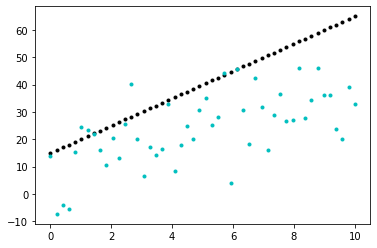

In [146]:
m_guess = 5  #making new guess
b_guess = 15

y_guess = m_guess * x + b_guess

plt.plot(x,y_guess,'k.');  
plt.plot(x,y,'c.');


In [147]:
#another bad guess

In [148]:
loss = np.sum((y_guess - y)**2)  #tells how wrong we are

In [149]:
loss #way off 

20130.716107101805

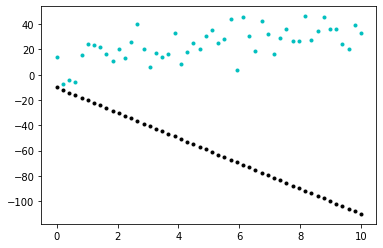

428147.3922452653 -10.0 -10.0


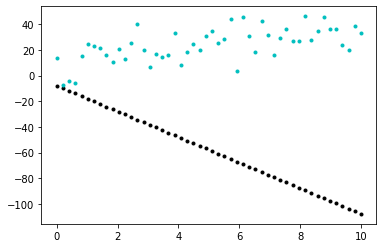

409721.8989215117 -10.0 -7.777777777777778


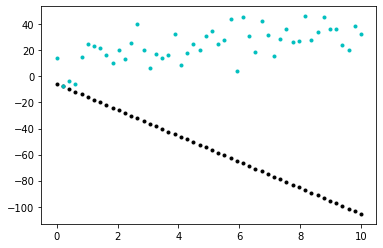

391790.23275825195 -10.0 -5.555555555555555


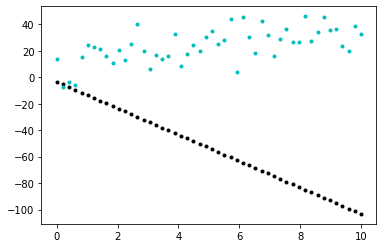

374352.39375548606 -10.0 -3.333333333333333


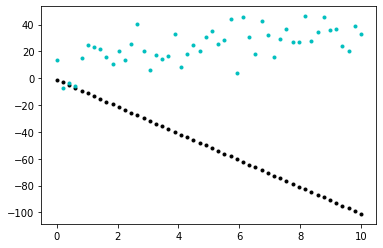

357408.38191321405 -10.0 -1.1111111111111107


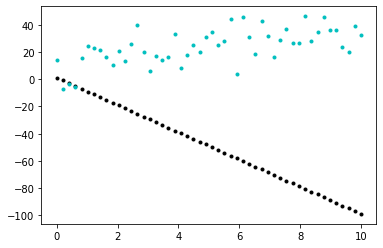

340958.1972314357 -10.0 1.1111111111111107


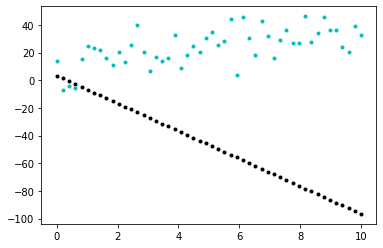

325001.83971015137 -10.0 3.333333333333334


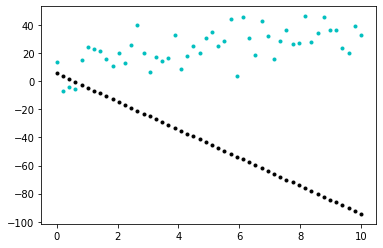

309539.30934936064 -10.0 5.555555555555557


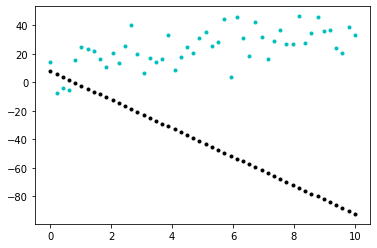

294570.6061490639 -10.0 7.777777777777779


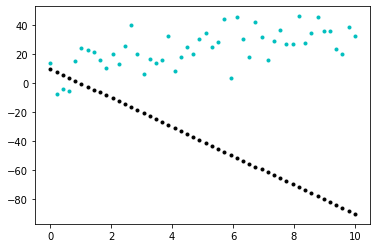

280095.73010926094 -10.0 10.0


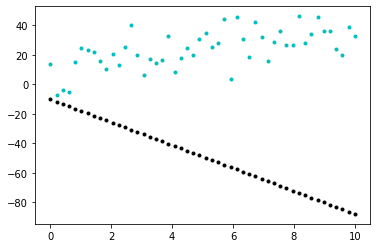

318605.735934034 -7.777777777777778 -10.0


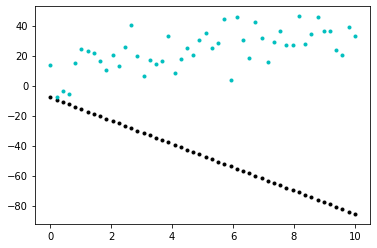

302649.37841274956 -7.777777777777778 -7.777777777777778


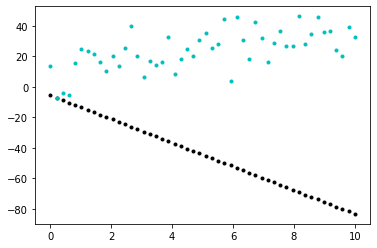

287186.8480519589 -7.777777777777778 -5.555555555555555


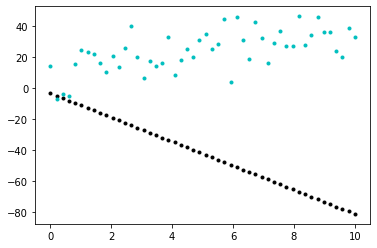

272218.14485166216 -7.777777777777778 -3.333333333333333


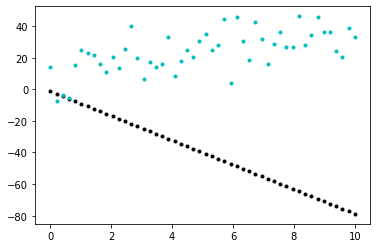

257743.26881185922 -7.777777777777778 -1.1111111111111107


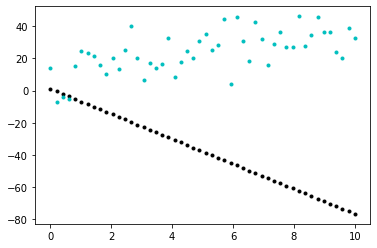

243762.2199325501 -7.777777777777778 1.1111111111111107


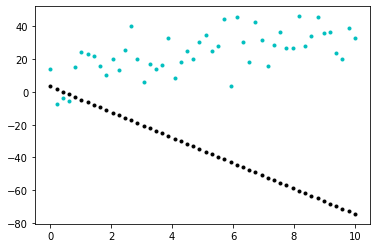

230274.99821373483 -7.777777777777778 3.333333333333334


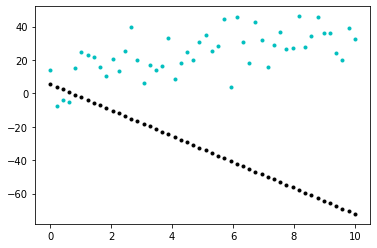

217281.60365541335 -7.777777777777778 5.555555555555557


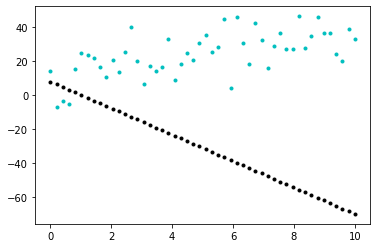

204782.03625758574 -7.777777777777778 7.777777777777779


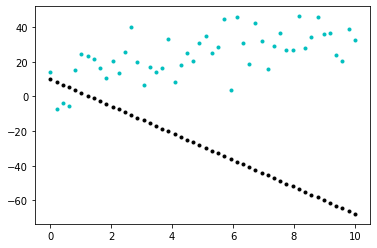

192776.29602025196 -7.777777777777778 10.0


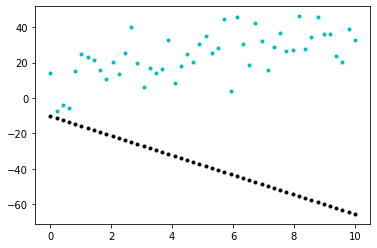

225692.95339453357 -5.555555555555555 -10.0


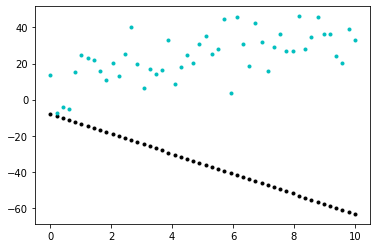

212205.73167571833 -5.555555555555555 -7.777777777777778


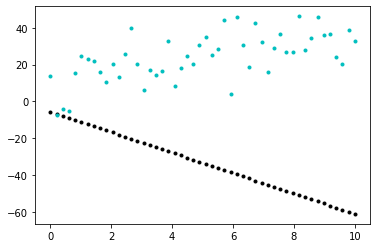

199212.33711739682 -5.555555555555555 -5.555555555555555


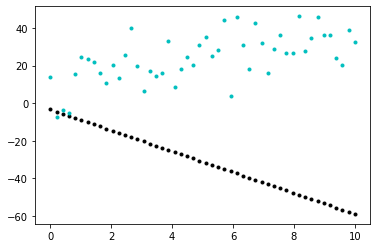

186712.7697195692 -5.555555555555555 -3.333333333333333


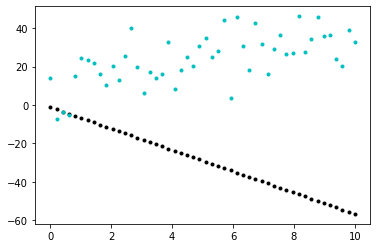

174707.0294822354 -5.555555555555555 -1.1111111111111107


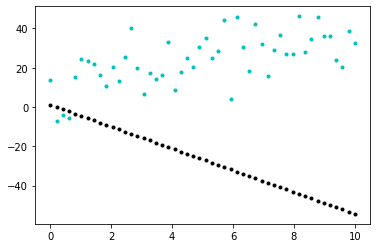

163195.11640539544 -5.555555555555555 1.1111111111111107


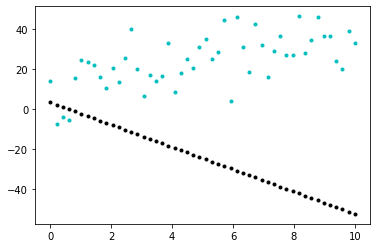

152177.03048904924 -5.555555555555555 3.333333333333334


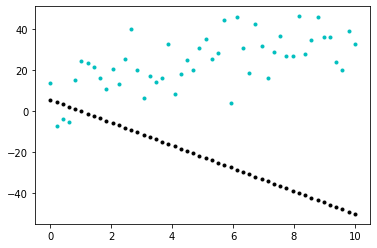

141652.7717331969 -5.555555555555555 5.555555555555557


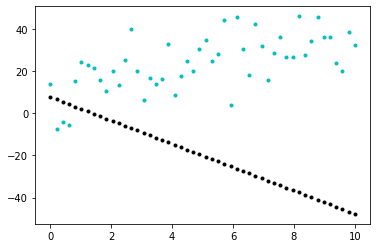

131622.34013783844 -5.555555555555555 7.777777777777779


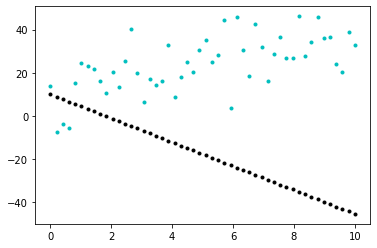

122085.73570297376 -5.555555555555555 10.0


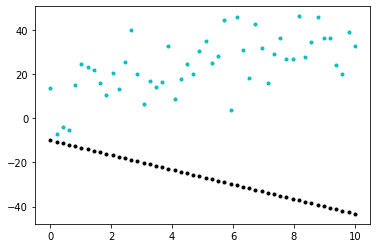

149409.0446267641 -3.333333333333333 -10.0


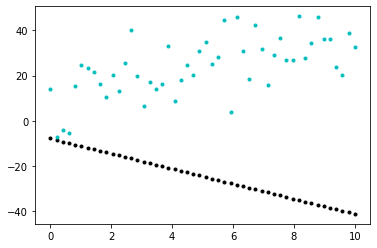

138390.95871041797 -3.333333333333333 -7.777777777777778


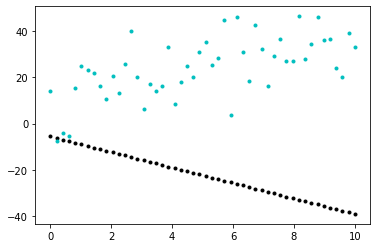

127866.69995456566 -3.333333333333333 -5.555555555555555


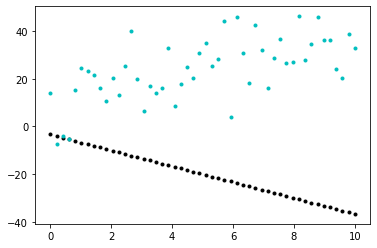

117836.26835920714 -3.333333333333333 -3.333333333333333


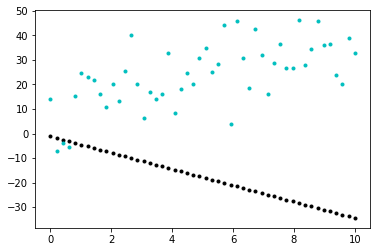

108299.66392434247 -3.333333333333333 -1.1111111111111107


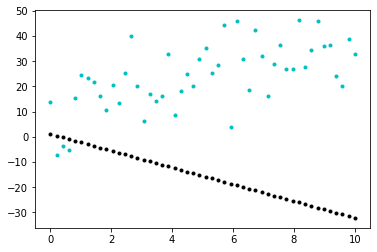

99256.88664997164 -3.333333333333333 1.1111111111111107


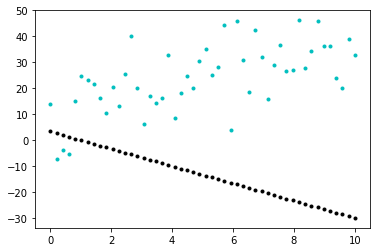

90707.93653609461 -3.333333333333333 3.333333333333334


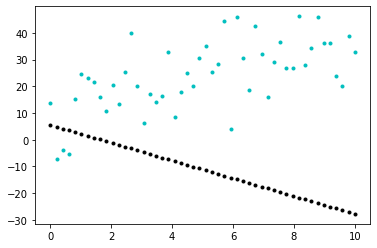

82652.81358271143 -3.333333333333333 5.555555555555557


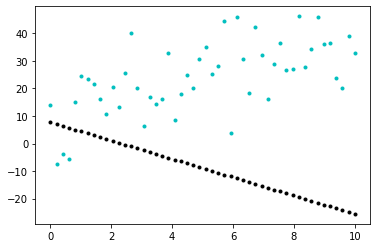

75091.51778982206 -3.333333333333333 7.777777777777779


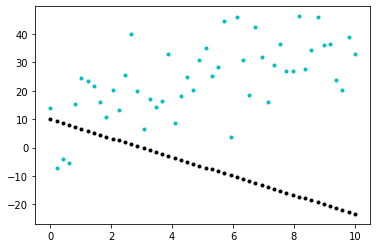

68024.04915742653 -3.333333333333333 10.0


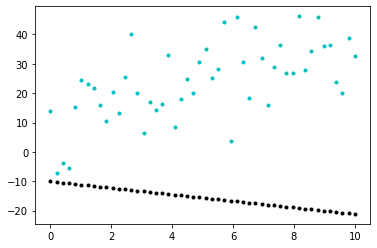

89754.00963072557 -1.1111111111111107 -10.0


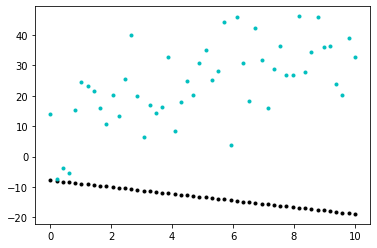

81205.05951684856 -1.1111111111111107 -7.777777777777778


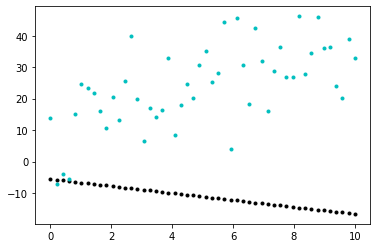

73149.93656346537 -1.1111111111111107 -5.555555555555555


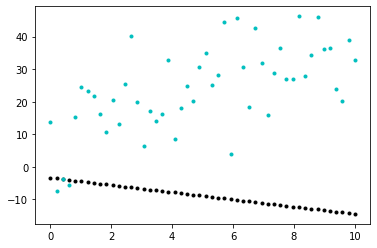

65588.64077057602 -1.1111111111111107 -3.333333333333333


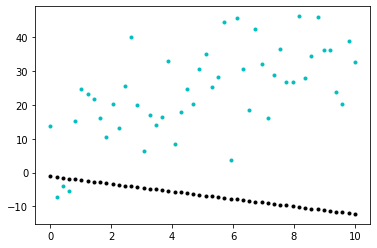

58521.172138180475 -1.1111111111111107 -1.1111111111111107


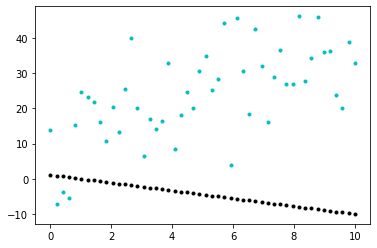

51947.53066627877 -1.1111111111111107 1.1111111111111107


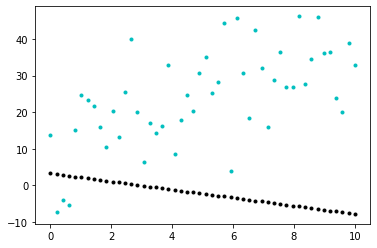

45867.71635487089 -1.1111111111111107 3.333333333333334


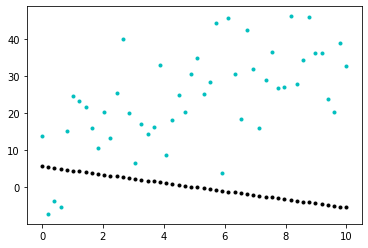

40281.729203956835 -1.1111111111111107 5.555555555555557


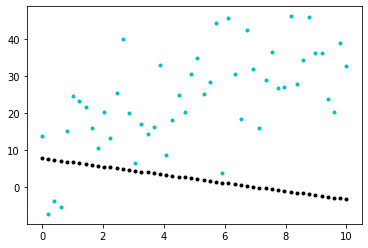

35189.56921353661 -1.1111111111111107 7.777777777777779


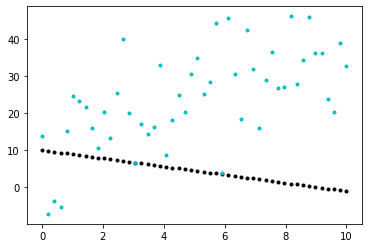

30591.236383610212 -1.1111111111111107 10.0


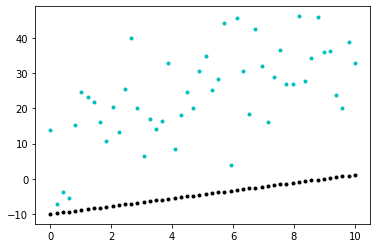

46727.84840641797 1.1111111111111107 -10.0


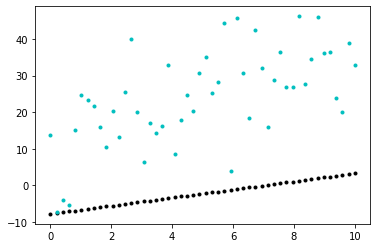

40648.03409501009 1.1111111111111107 -7.777777777777778


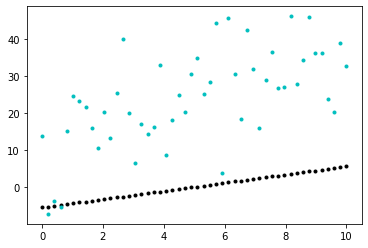

35062.04694409603 1.1111111111111107 -5.555555555555555


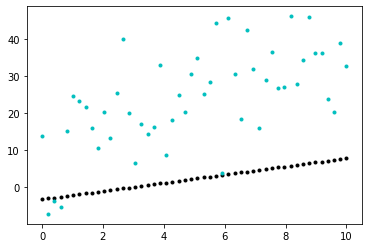

29969.886953675807 1.1111111111111107 -3.333333333333333


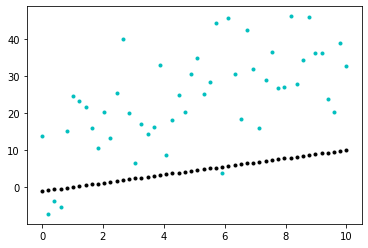

25371.554123749407 1.1111111111111107 -1.1111111111111107


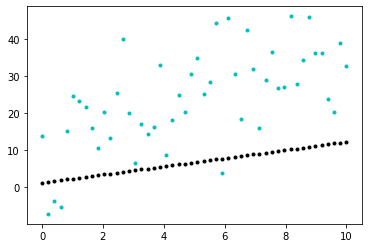

21267.048454316835 1.1111111111111107 1.1111111111111107


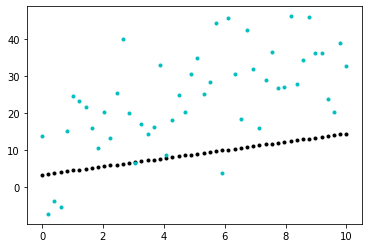

17656.369945378086 1.1111111111111107 3.333333333333334


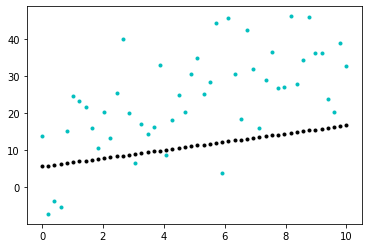

14539.518596933169 1.1111111111111107 5.555555555555557


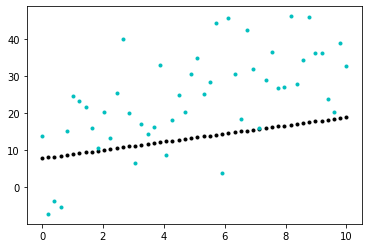

11916.494408982076 1.1111111111111107 7.777777777777779


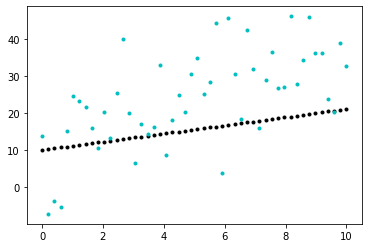

9787.297381524813 1.1111111111111107 10.0


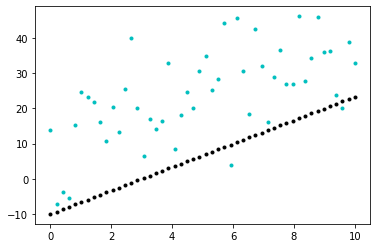

20330.560953841243 3.333333333333334 -10.0


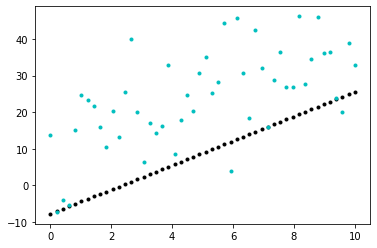

16719.8824449025 3.333333333333334 -7.777777777777778


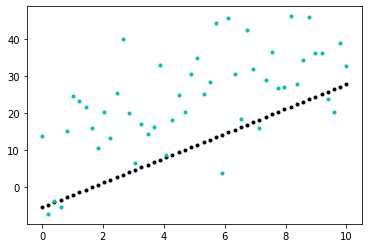

13603.031096457582 3.333333333333334 -5.555555555555555


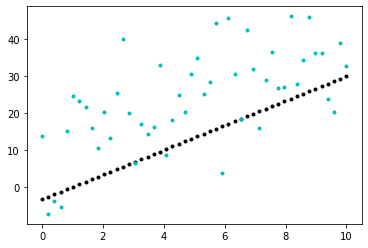

10980.006908506492 3.333333333333334 -3.333333333333333


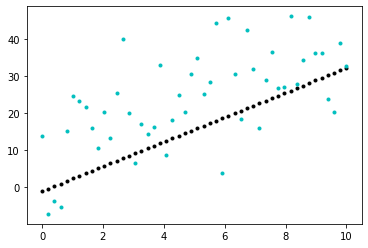

8850.809881049228 3.333333333333334 -1.1111111111111107


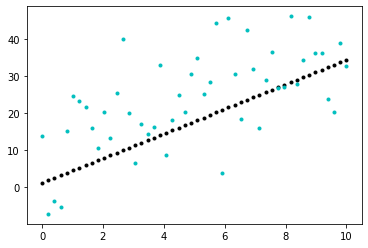

7215.440014085794 3.333333333333334 1.1111111111111107


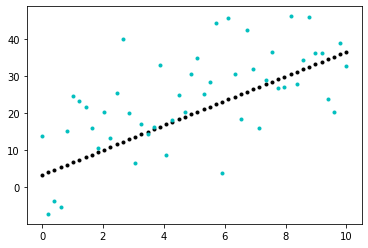

6073.897307616186 3.333333333333334 3.333333333333334


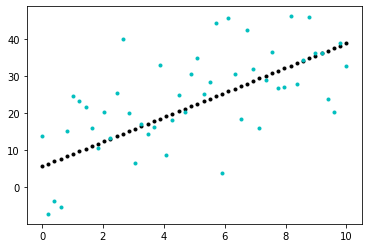

5426.181761640403 3.333333333333334 5.555555555555557


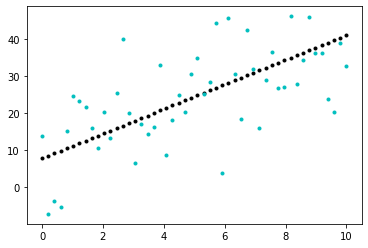

5272.293376158448 3.333333333333334 7.777777777777779


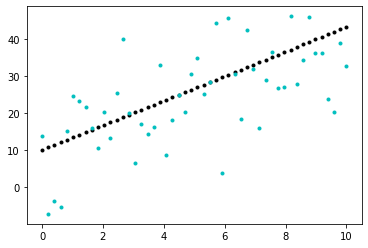

5612.232151170322 3.333333333333334 10.0


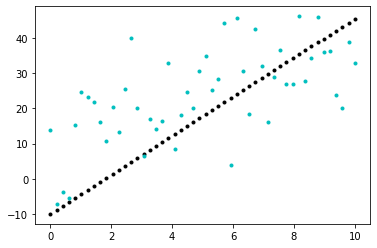

10562.14727299545 5.555555555555557 -10.0


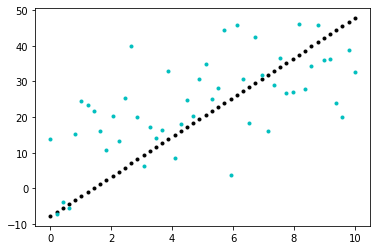

9420.604566525844 5.555555555555557 -7.777777777777778


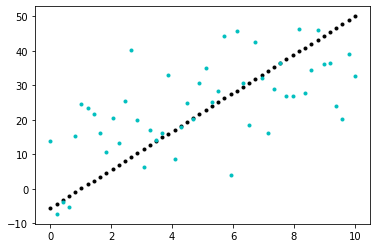

8772.889020550065 5.555555555555557 -5.555555555555555


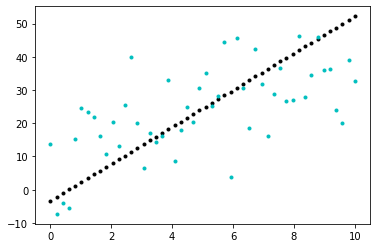

8619.000635068109 5.555555555555557 -3.333333333333333


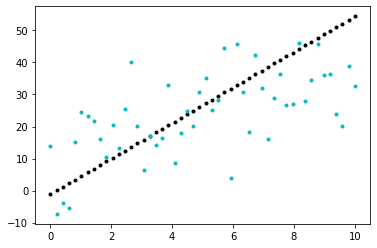

8958.939410079985 5.555555555555557 -1.1111111111111107


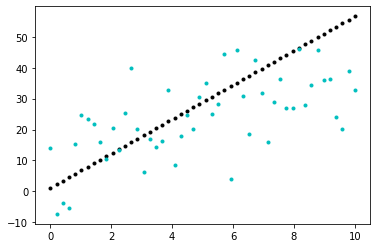

9792.705345585686 5.555555555555557 1.1111111111111107


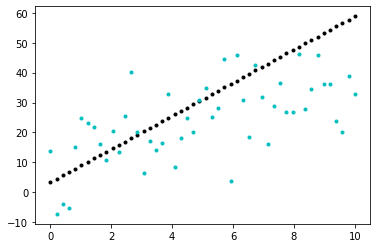

11120.298441585215 5.555555555555557 3.333333333333334


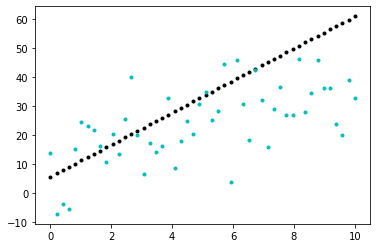

12941.718698078572 5.555555555555557 5.555555555555557


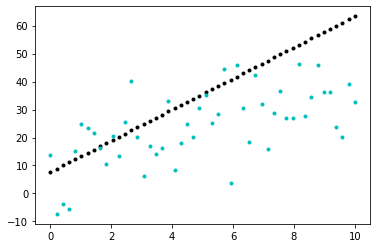

15256.966115065752 5.555555555555557 7.777777777777779


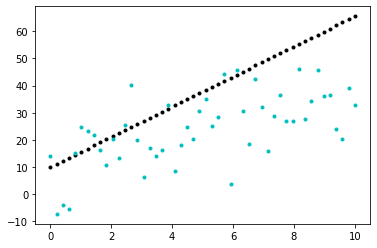

18066.04069254676 5.555555555555557 10.0


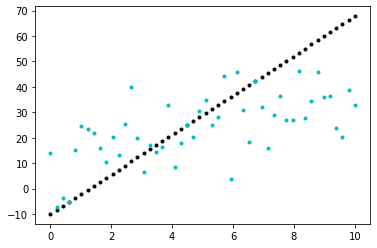

17422.607363880576 7.777777777777779 -10.0


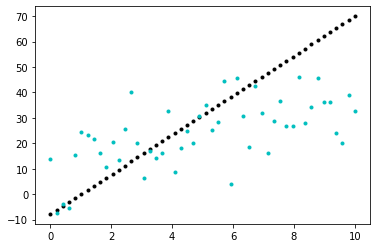

18750.200459880107 7.777777777777779 -7.777777777777778


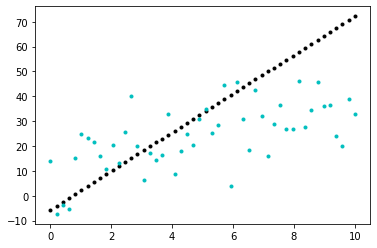

20571.620716373458 7.777777777777779 -5.555555555555555


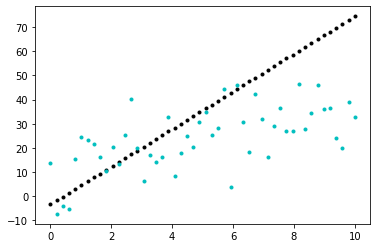

22886.86813336064 7.777777777777779 -3.333333333333333


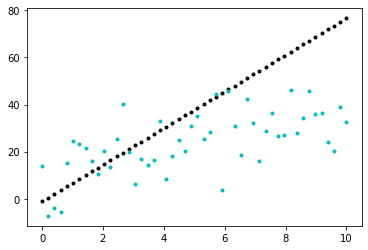

25695.94271084165 7.777777777777779 -1.1111111111111107


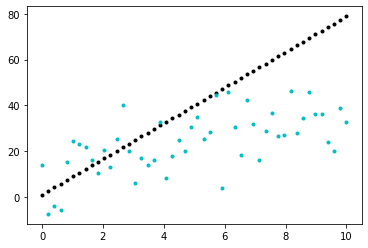

28998.844448816482 7.777777777777779 1.1111111111111107


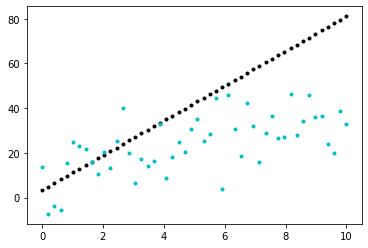

32795.57334728515 7.777777777777779 3.333333333333334


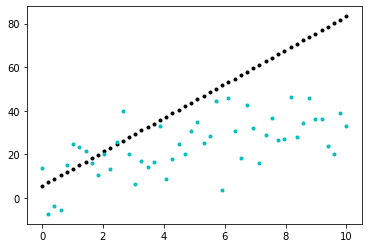

37086.129406247645 7.777777777777779 5.555555555555557


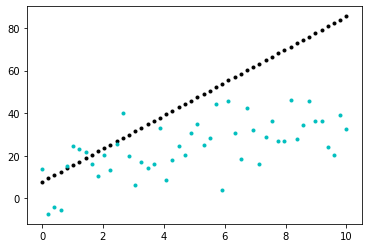

41870.51262570396 7.777777777777779 7.777777777777779


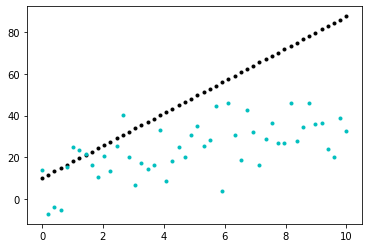

47148.7230056541 7.777777777777779 10.0


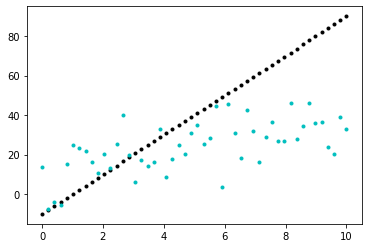

40911.94122649661 10.0 -10.0


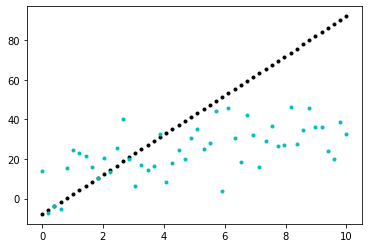

44708.67012496528 10.0 -7.777777777777778


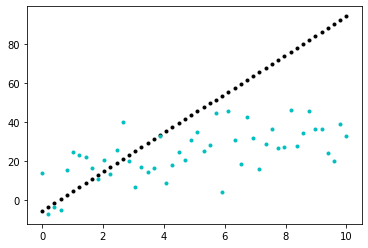

48999.226183927756 10.0 -5.555555555555555


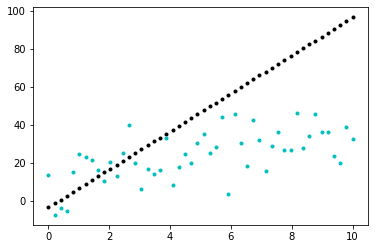

53783.60940338408 10.0 -3.333333333333333


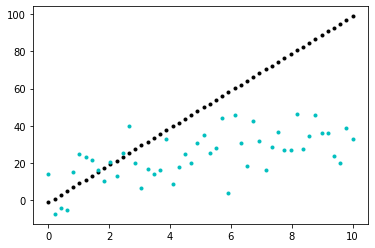

59061.81978333421 10.0 -1.1111111111111107


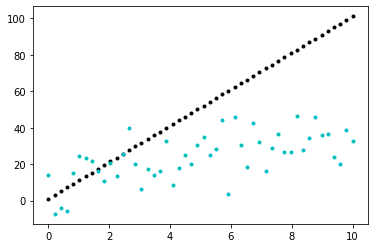

64833.8573237782 10.0 1.1111111111111107


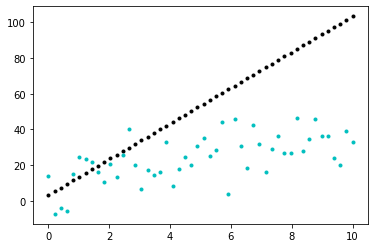

71099.72202471599 10.0 3.333333333333334


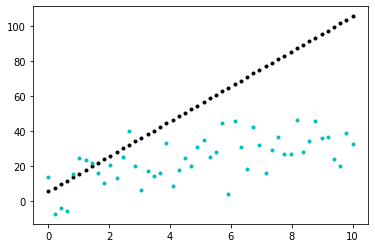

77859.41388614762 10.0 5.555555555555557


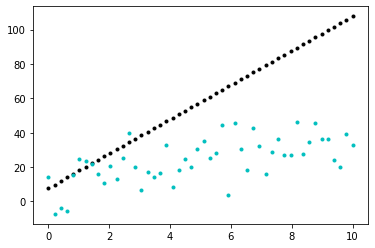

85112.93290807305 10.0 7.777777777777779


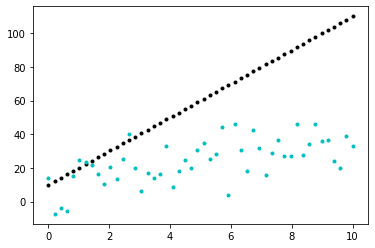

92860.27909049236 10.0 10.0


In [152]:
for m_guess in np.linspace(-10,10,10):  #double loop
    for b_guess in np.linspace(-10,10,10):
        
        y_guess = m_guess * x + b_guess

        plt.plot(x,y_guess,'k.');
        plt.plot(x,y,'c.');
        plt.show()

        loss = np.sum((y_guess - y)**2)

        print(loss,m_guess,b_guess)

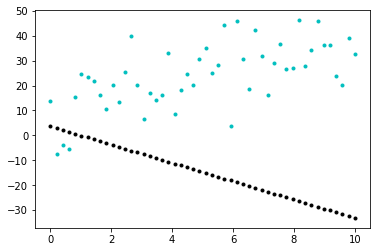

97941.81271997263 -3.6842105263157894 3.6842105263157894


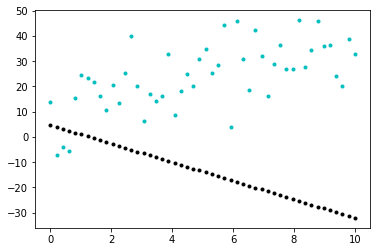

93916.93299536296 -3.6842105263157894 4.7368421052631575


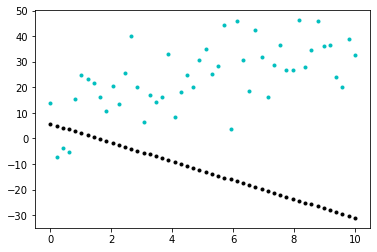

90002.85659485306 -3.6842105263157894 5.789473684210526


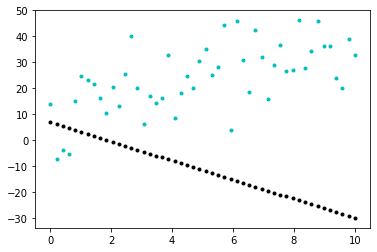

86199.58351844286 -3.6842105263157894 6.842105263157894


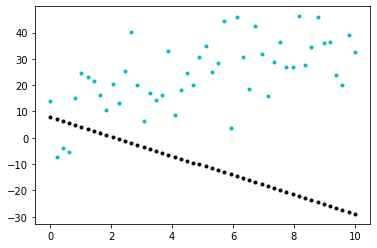

82507.11376613239 -3.6842105263157894 7.894736842105264


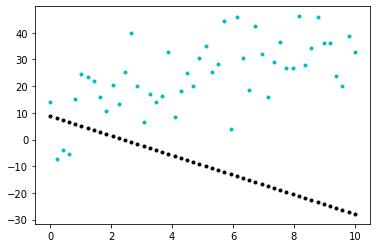

78925.44733792165 -3.6842105263157894 8.94736842105263


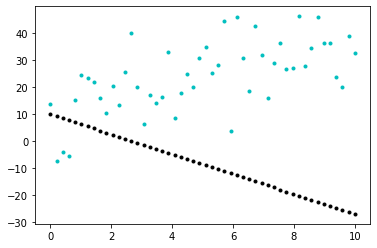

75454.58423381062 -3.6842105263157894 10.0


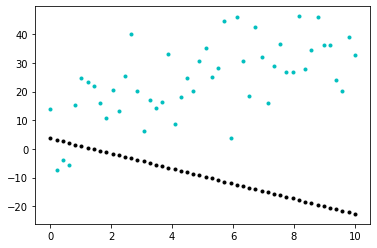

73569.81854853989 -2.6315789473684212 3.6842105263157894


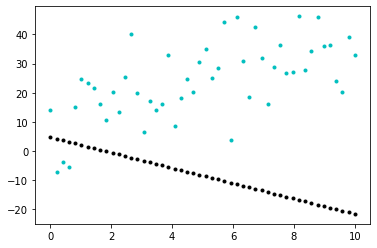

70098.95544442888 -2.6315789473684212 4.7368421052631575


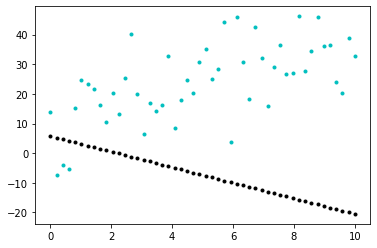

66738.89566441756 -2.6315789473684212 5.789473684210526


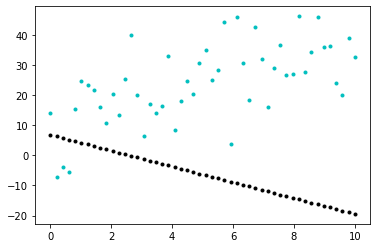

63489.63920850598 -2.6315789473684212 6.842105263157894


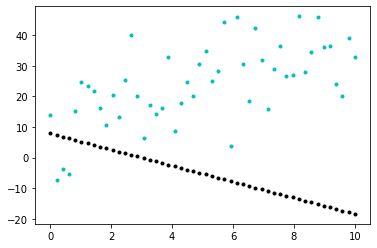

60351.18607669412 -2.6315789473684212 7.894736842105264


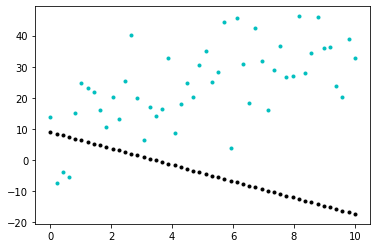

57323.53626898199 -2.6315789473684212 8.94736842105263


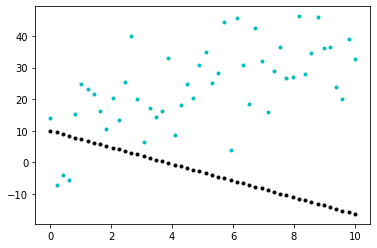

54406.68978536958 -2.6315789473684212 10.0


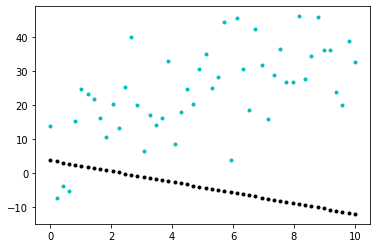

52928.9567192407 -1.578947368421053 3.6842105263157894


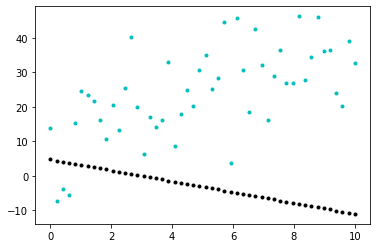

50012.110235628286 -1.578947368421053 4.7368421052631575


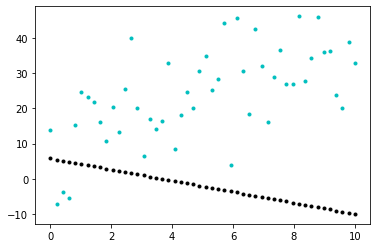

47206.06707611559 -1.578947368421053 5.789473684210526


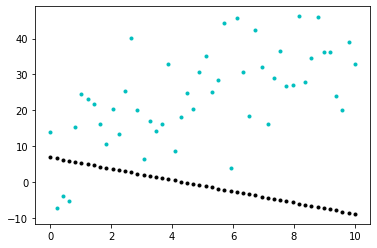

44510.82724070262 -1.578947368421053 6.842105263157894


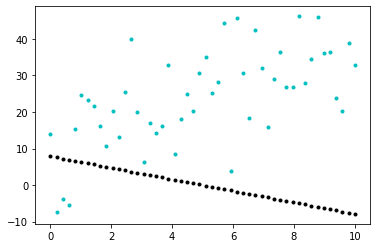

41926.39072938937 -1.578947368421053 7.894736842105264


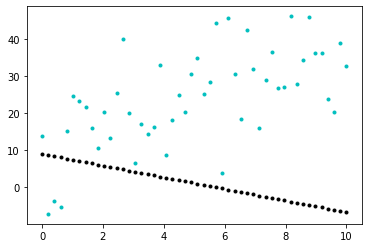

39452.75754217587 -1.578947368421053 8.94736842105263


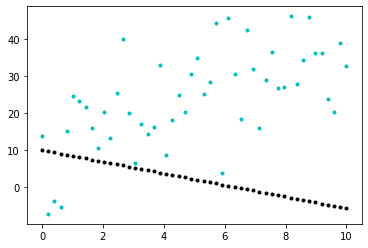

37089.927679062064 -1.578947368421053 10.0


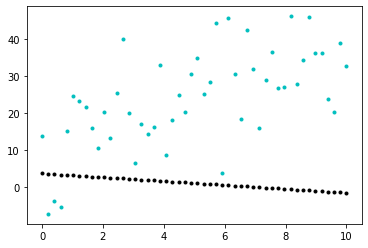

36019.22723207502 -0.526315789473685 3.6842105263157894


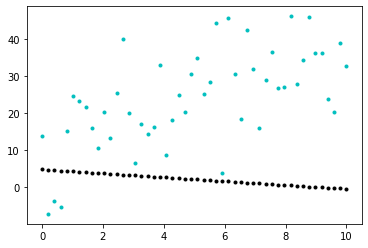

33656.397368961225 -0.526315789473685 4.7368421052631575


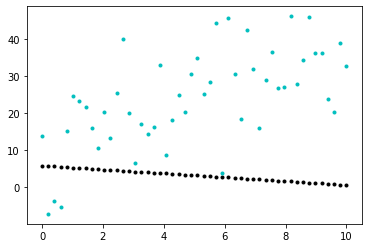

31404.37082994715 -0.526315789473685 5.789473684210526


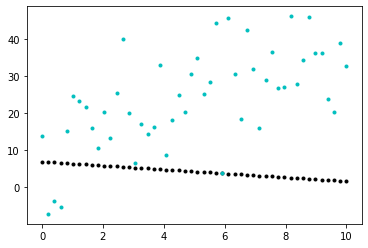

29263.147615032798 -0.526315789473685 6.842105263157894


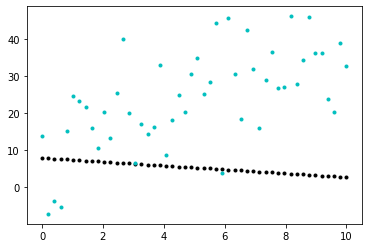

27232.727724218166 -0.526315789473685 7.894736842105264


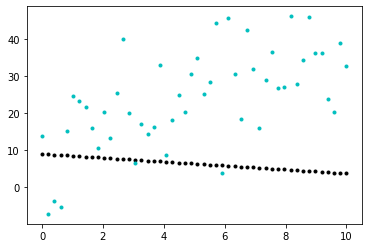

25313.11115750326 -0.526315789473685 8.94736842105263


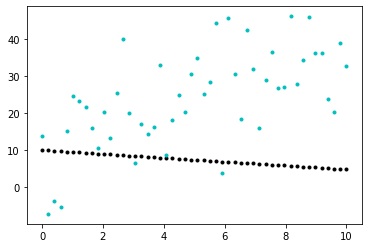

23504.297914888073 -0.526315789473685 10.0


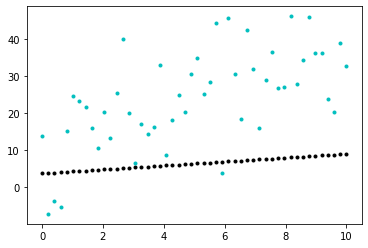

22840.63008704288 0.5263157894736832 3.6842105263157894


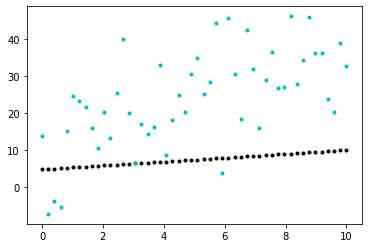

21031.816844427693 0.5263157894736832 4.7368421052631575


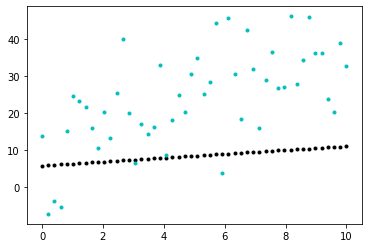

19333.806925912235 0.5263157894736832 5.789473684210526


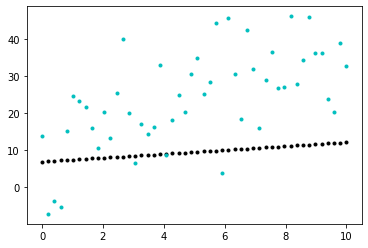

17746.600331496495 0.5263157894736832 6.842105263157894


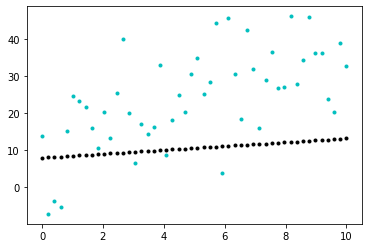

16270.197061180479 0.5263157894736832 7.894736842105264


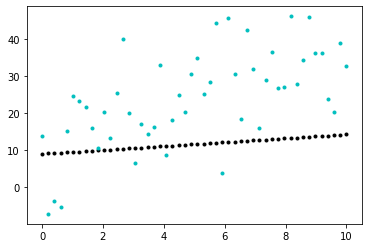

14904.597114964192 0.5263157894736832 8.94736842105263


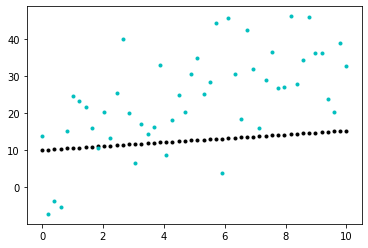

13649.80049284762 0.5263157894736832 10.0


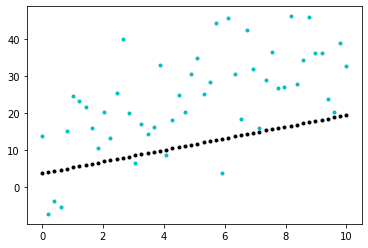

13393.16528414426 1.5789473684210513 3.6842105263157894


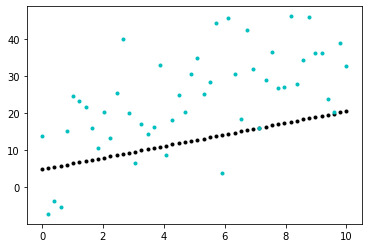

12138.36866202769 1.5789473684210513 4.7368421052631575


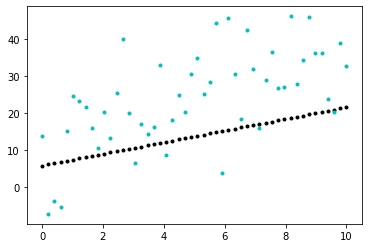

10994.375364010844 1.5789473684210513 5.789473684210526


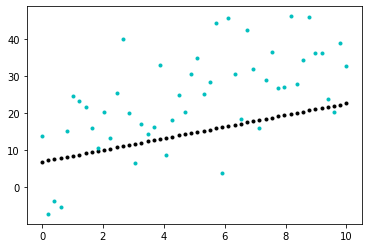

9961.185390093722 1.5789473684210513 6.842105263157894


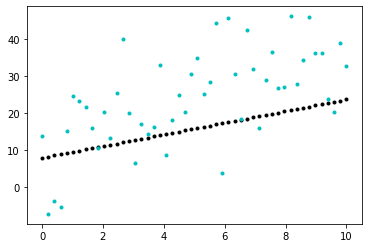

9038.798740276321 1.5789473684210513 7.894736842105264


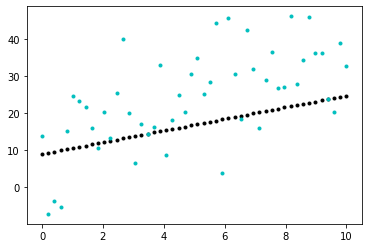

8227.215414558646 1.5789473684210513 8.94736842105263


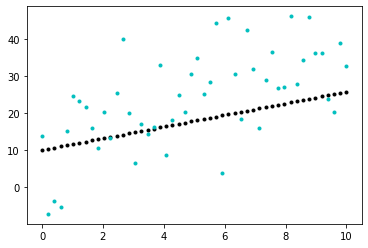

7526.435412940692 1.5789473684210513 10.0


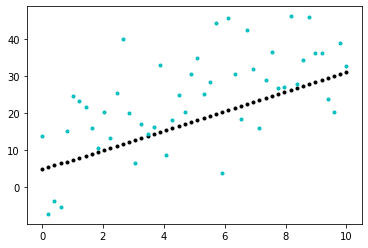

6976.05282176121 2.6315789473684212 4.7368421052631575


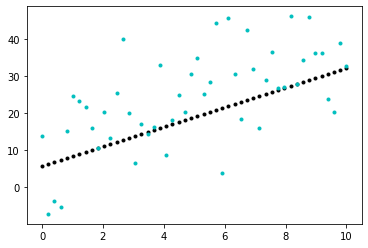

6386.076144242981 2.6315789473684212 5.789473684210526


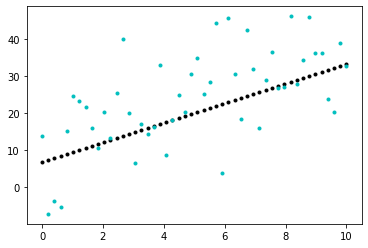

5906.902790824474 2.6315789473684212 6.842105263157894


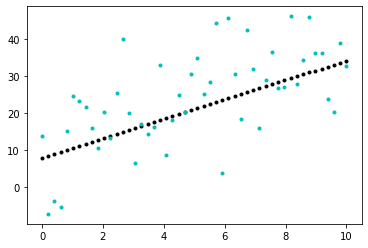

5538.5327615056885 2.6315789473684212 7.894736842105264


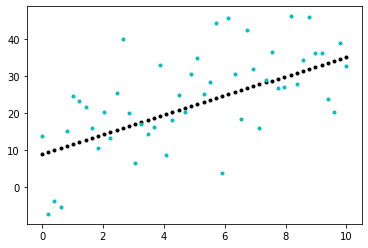

5280.966056286628 2.6315789473684212 8.94736842105263


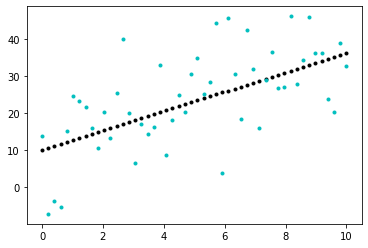

5134.202675167291 2.6315789473684212 10.0


In [153]:
best_loss = 100000   #another best guess
best_m = 0
best_b = 0 
for m_guess in np.linspace(-10,10,20):
    for b_guess in np.linspace(-10,10,20):
        
        y_guess = m_guess * x + b_guess

        loss = np.sum((y_guess - y)**2)

        if loss < best_loss:
            
            best_loss = loss
            best_m = m_guess
            best_b = b_guess 

            plt.plot(x,y_guess,'k.');
            plt.plot(x,y,'c.');
            plt.show()

            print(loss,m_guess,b_guess)